In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
image_path=Path("C:/Users/bsai3/Downloads/cnn/images")
images_path=list(image_path.glob("*.PNG"))

In [3]:
images_path

[WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0001.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0002.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0003.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0004.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0005.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0006.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0007.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0008.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0009.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0010.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0011.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0012.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0013.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0014.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0015.png'),
 WindowsPath('C:/Users/bsai3/Downloads/cnn/images/0016.png'),
 Windows

In [4]:
from PIL import Image
images=[]
for image_path in images_path:
    image=Image.open(image_path)
    images.append(image)

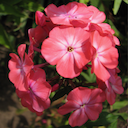

In [5]:
images[0]

In [6]:
type(images[0])

PIL.PngImagePlugin.PngImageFile

In [7]:
import cv2
x=[]
for image in images_path:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(128,128))
        x.append(resized_img)

In [8]:
x[0]

array([[[ 10,  22,  13],
        [  9,  23,  14],
        [ 10,  24,  16],
        ...,
        [ 78, 143, 128],
        [ 85, 148, 134],
        [ 78, 140, 125]],

       [[ 10,  21,  15],
        [  9,  23,  14],
        [ 11,  25,  17],
        ...,
        [ 81, 152, 126],
        [ 96, 170, 146],
        [ 94, 158, 139]],

       [[ 10,  24,  16],
        [ 11,  25,  17],
        [ 12,  25,  17],
        ...,
        [ 32,  72,  48],
        [ 67, 139, 112],
        [ 88, 157, 135]],

       ...,

       [[ 56,  75,  92],
        [ 58,  78,  97],
        [ 58,  79,  98],
        ...,
        [ 44,  61,  76],
        [ 40,  52,  69],
        [ 37,  44,  54]],

       [[ 56,  75,  90],
        [ 57,  77,  94],
        [ 59,  79,  97],
        ...,
        [ 38,  46,  63],
        [ 22,  30,  38],
        [ 57,  61,  87]],

       [[ 55,  73,  89],
        [ 58,  77,  96],
        [ 61,  80,  99],
        ...,
        [ 38,  38,  59],
        [ 16,  25,  26],
        [ 78,  74, 117]]

In [9]:
df=pd.read_csv("C:/Users/bsai3/Downloads/cnn/flower_labels.csv")

In [10]:
df.columns

Index(['file', 'label'], dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,df["label"],test_size=0.2)

In [12]:
y_train

178    2
23     4
16     0
63     8
13     7
      ..
45     4
185    9
182    8
72     9
123    5
Name: label, Length: 168, dtype: int64

In [13]:
df["label"].unique()

array([0, 2, 1, 6, 7, 4, 5, 3, 8, 9], dtype=int64)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
num_classes=10
model=Sequential([
    layers.Conv2D(15,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10,activation="relu"),
    layers.Dense(num_classes, activation="sigmoid")
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
len(x_train)

168

In [25]:
len(y_train)

168

In [26]:
shape=[i.shape for i in x_train]
shape=pd.Series(shape)
shape.unique()

array([(128, 128, 3)], dtype=object)

In [27]:
x_train=pd.Series(x_train)

In [28]:
typ=[type(i) for i in x_train]
typ=pd.Series(typ)
typ.unique()

array([<class 'numpy.ndarray'>], dtype=object)

In [29]:
x_train_conv=pd.Series(i for i in x_train)
print(x_train_conv)

0      [[[117, 134, 109], [96, 119, 96], [72, 85, 82]...
1      [[[16, 32, 21], [15, 27, 18], [20, 37, 25], [2...
2      [[[32, 68, 50], [37, 75, 58], [39, 73, 60], [4...
3      [[[12, 16, 13], [12, 16, 14], [13, 16, 14], [1...
4      [[[184, 133, 86], [184, 134, 87], [184, 134, 8...
                             ...                        
163    [[[31, 43, 32], [27, 40, 28], [26, 38, 28], [2...
164    [[[30, 72, 82], [22, 35, 33], [21, 28, 29], [2...
165    [[[140, 167, 141], [143, 169, 143], [142, 168,...
166    [[[113, 181, 149], [93, 171, 132], [56, 139, 9...
167    [[[30, 45, 34], [18, 25, 20], [18, 25, 21], [1...
Length: 168, dtype: object


In [30]:
x_train_conv=np.array(x_train_conv.tolist())
x_train_conv=x_train_conv.reshape((-1,)+(128,128,3))
x_train_conv=x_train_conv.astype('float32')
x_train_conv/=255.0

In [31]:
model.fit(x_train_conv,y_train,epochs=100)

Epoch 1/100
6/6 [==============================] - 2s 108ms/step - loss: 2.3161 - accuracy: 0.1071
Epoch 2/100
6/6 [==============================] - 1s 125ms/step - loss: 2.2719 - accuracy: 0.2143
Epoch 3/100
6/6 [==============================] - 1s 116ms/step - loss: 2.2126 - accuracy: 0.1548
Epoch 4/100
6/6 [==============================] - 1s 101ms/step - loss: 2.1438 - accuracy: 0.1548
Epoch 5/100
6/6 [==============================] - 1s 97ms/step - loss: 2.1051 - accuracy: 0.2202
Epoch 6/100
6/6 [==============================] - 1s 90ms/step - loss: 2.0493 - accuracy: 0.2024
Epoch 7/100
6/6 [==============================] - 1s 90ms/step - loss: 2.0253 - accuracy: 0.2500
Epoch 8/100
6/6 [==============================] - 1s 94ms/step - loss: 1.9589 - accuracy: 0.3095
Epoch 9/100
6/6 [==============================] - 1s 93ms/step - loss: 1.9066 - accuracy: 0.2083
Epoch 10/100
6/6 [==============================] - 1s 92ms/step - loss: 1.8141 - accuracy: 0.3155
Epoch 11/100
6/

6/6 [==============================] - 1s 92ms/step - loss: 0.1996 - accuracy: 1.0000
Epoch 84/100
6/6 [==============================] - 1s 93ms/step - loss: 0.1987 - accuracy: 1.0000
Epoch 85/100
6/6 [==============================] - 1s 92ms/step - loss: 0.1981 - accuracy: 1.0000
Epoch 86/100
6/6 [==============================] - 1s 93ms/step - loss: 0.1971 - accuracy: 1.0000
Epoch 87/100
6/6 [==============================] - 1s 92ms/step - loss: 0.1956 - accuracy: 1.0000
Epoch 88/100
6/6 [==============================] - 1s 92ms/step - loss: 0.1959 - accuracy: 0.9940
Epoch 89/100
6/6 [==============================] - 1s 94ms/step - loss: 0.1961 - accuracy: 1.0000
Epoch 90/100
6/6 [==============================] - 1s 93ms/step - loss: 0.1948 - accuracy: 1.0000
Epoch 91/100
6/6 [==============================] - 1s 96ms/step - loss: 0.1928 - accuracy: 1.0000
Epoch 92/100
6/6 [==============================] - 1s 106ms/step - loss: 0.1918 - accuracy: 1.0000
Epoch 93/100
6/6 [====

In [32]:
x_test_conv=pd.Series(i for i in x_test)
x_test_conv=np.array(x_test_conv.tolist())
x_test_conv=x_test_conv.reshape((-1,)+(128,128,3))
x_test_conv=x_test_conv.astype('float32')
x_test_conv/=255.0

In [33]:
predict=model.predict(x_test_conv)
predict

2/2 [==============================] - 0s 30ms/step


array([[1.00000000e+00, 2.73853482e-04, 1.24367537e-30, 9.99999940e-01,
        8.62552583e-01, 1.00000000e+00, 1.00000000e+00, 2.02014858e-22,
        4.19990579e-03, 1.00000000e+00],
       [1.00000000e+00, 8.11414123e-01, 6.52410485e-37, 1.00000000e+00,
        3.14599602e-04, 1.00000000e+00, 1.00000000e+00, 2.34725146e-22,
        9.73643124e-01, 1.00000000e+00],
       [1.42421144e-12, 1.00000000e+00, 1.00000000e+00, 9.99856055e-01,
        1.01225654e-04, 9.98464763e-01, 5.05735471e-12, 1.00000000e+00,
        7.36042683e-04, 1.12020816e-05],
       [1.00000000e+00, 1.08556457e-01, 1.72019522e-24, 1.00000000e+00,
        3.22590815e-03, 1.00000000e+00, 1.00000000e+00, 1.22229280e-13,
        9.99796808e-01, 9.99927878e-01],
       [1.54221125e-09, 1.00000000e+00, 5.21149479e-09, 1.00000000e+00,
        8.88477203e-09, 1.00000000e+00, 2.25408092e-01, 9.99621212e-01,
        1.00000000e+00, 1.34523157e-11],
       [1.46123888e-36, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
   

In [34]:
model.evaluate(x_test_conv,y_test)

2/2 [==============================] - 0s 20ms/step - loss: 15.8894 - accuracy: 0.1905


[15.889354705810547, 0.190476194024086]

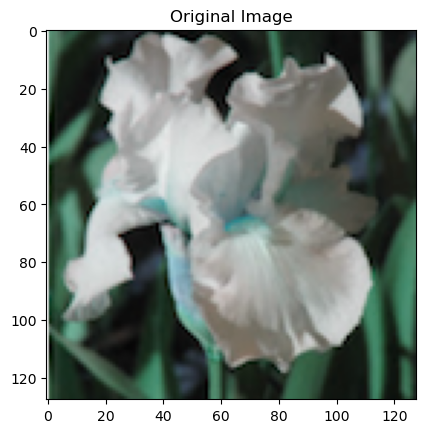

In [35]:
plt.imshow(x_test_conv[0].reshape(128,128,3),cmap='gray')
plt.title('Original Image')
plt.show()